In [2]:
!pip install plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import warnings
import plotly.offline as py
from ipywidgets import interact
import plotly.graph_objs as go
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1")

In [3]:
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [4]:
df.shape

(181691, 135)

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'Attack_Type','provstate':'State','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','State','Region','City','latitude','longitude','Attack_Type','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]


In [6]:
df.head(10)

,Year,Month,Day,Country,State,Region,City,latitude,longitude,Attack_Type,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,0.0,Edes Substation,Unknown,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,0.0,Selective Service Headquarters in Madison Wisc...,New Year's Gang,Government (General),Incendiary


In [7]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attack_Type        0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   Attack_Type  181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Casualities  164817 non-null  float64
 13  Target       181055 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
dtypes: float64(5), int64(3), object(9)
memory usage: 23.6+ MB


In [9]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


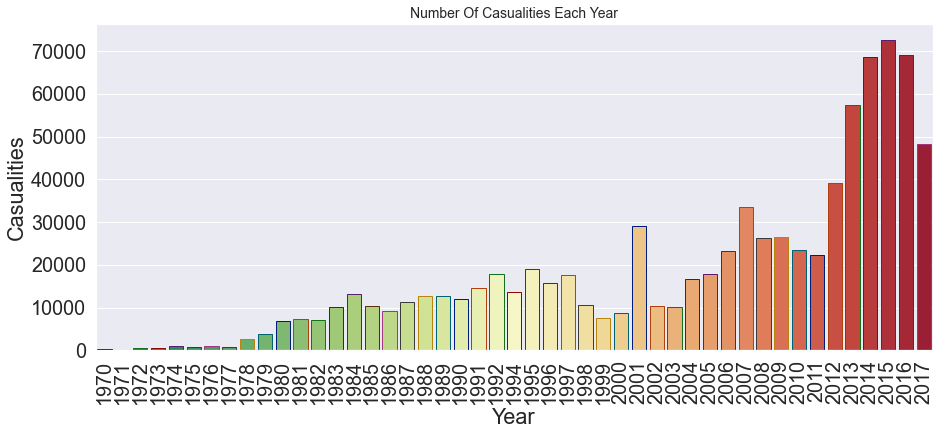

In [58]:
plt.subplots(figsize=(15,6))
year_cas = df.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year', fontsize=14)
plt.show()

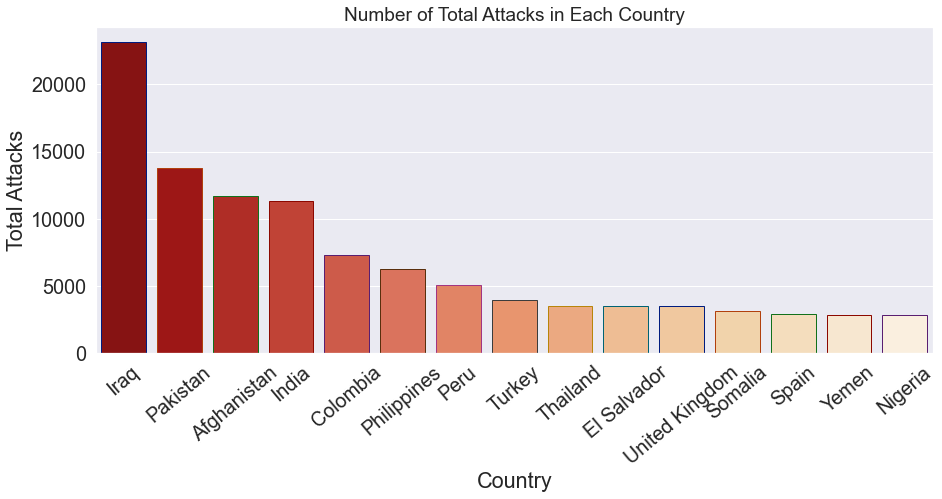

In [55]:
plt.subplots(figsize=(15,6))
country_attacks = df.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',20))
plt.xticks(rotation=40)
plt.title('Number of Total Attacks in Each Country',  fontsize=19)
plt.show()

Text(0.5, 1.0, 'Types of Targets of Terrorist Attack ')

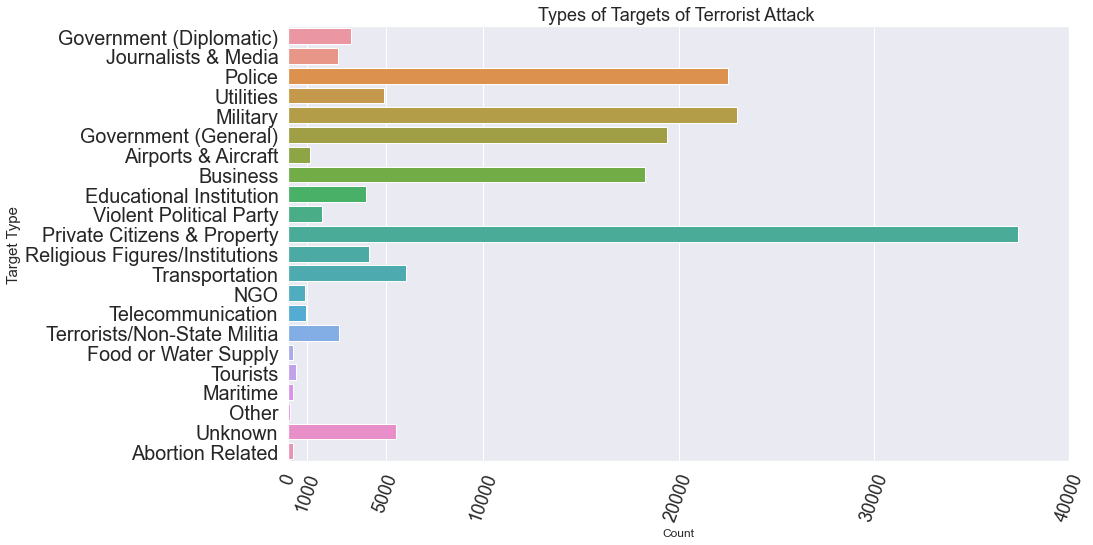

In [59]:
f = plt.figure(figsize=(14, 8))

sns.set(font_scale=1.8)
year_count = sns.countplot(y='Target_type', data=df,)
# year_count.set_xticklabels(year_count.get_xticklabels(), rotation=70)
year_count.set_xlabel('Count', fontsize=18)
year_count.set_ylabel('Target Type', fontsize=18)
plt.xlabel('Count', fontsize=12)
target_type_xticks  = [0, 1000, 5000, 10000, 20000, 30000, 40000]
target_type_xlabels = ['0', '1000', '5000', '10000', '20000', '30000', '40000']
plt.xticks(target_type_xticks, target_type_xlabels, fontsize=18, rotation=70)
plt.ylabel('Target Type', fontsize=15)
plt.title('Types of Targets of Terrorist Attack ', fontsize=18)

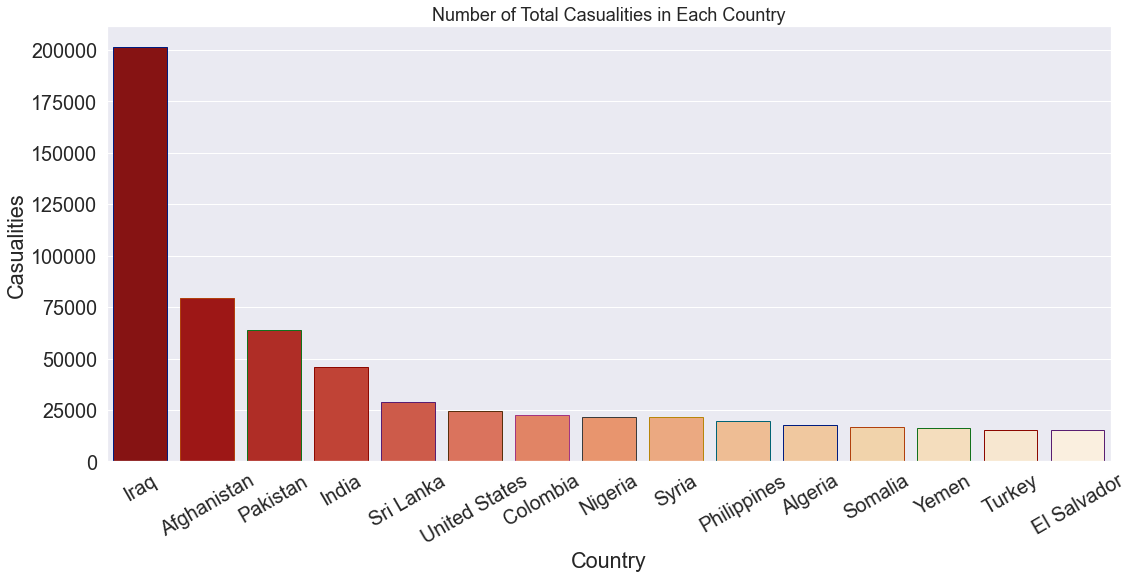

In [60]:
plt.subplots(figsize=(18,8))
count_cas = df.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.Casualities, palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Casualities in Each Country', fontsize=18)
plt.show()

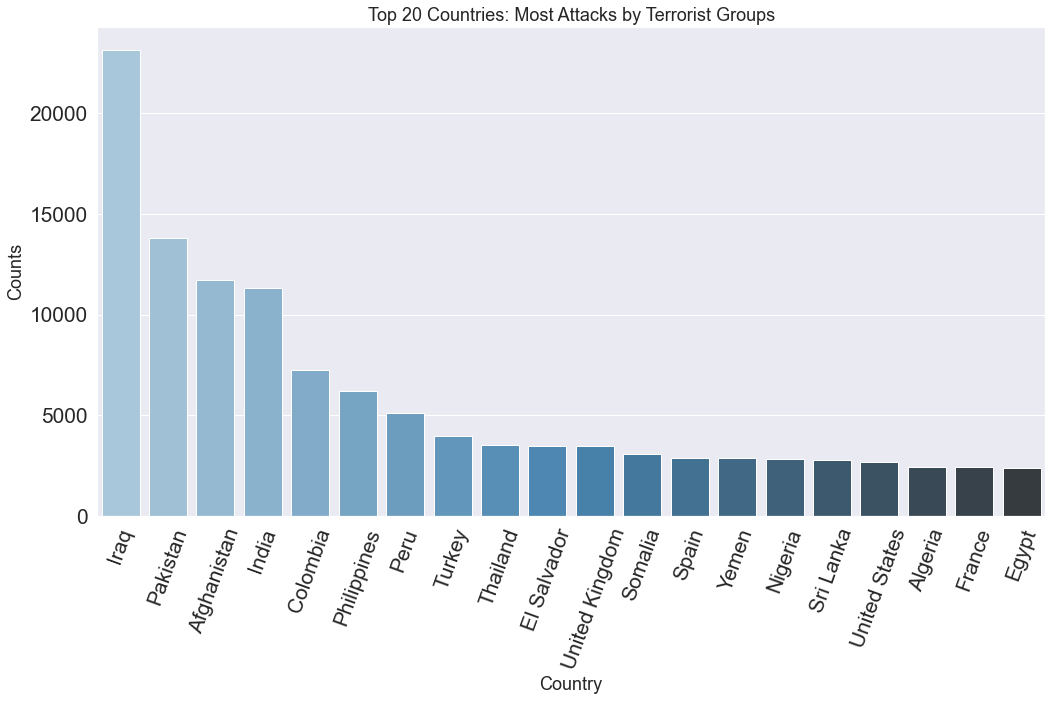

In [106]:
fig= plt.figure(figsize=(17, 9))
terror_country = sns.barplot(x=df['Country'].value_counts()[0:20].index, y=df['Country'].value_counts()[0:20], palette='Blues_d')
terror_country.set_xticklabels(terror_country.get_xticklabels(), rotation=70)
terror_country.set_xlabel('Country', fontsize=18)
terror_country.set_ylabel('Counts', fontsize=18)
plt.title('Top 20 Countries: Most Attacks by Terrorist Groups', fontsize=18)
plt.show()

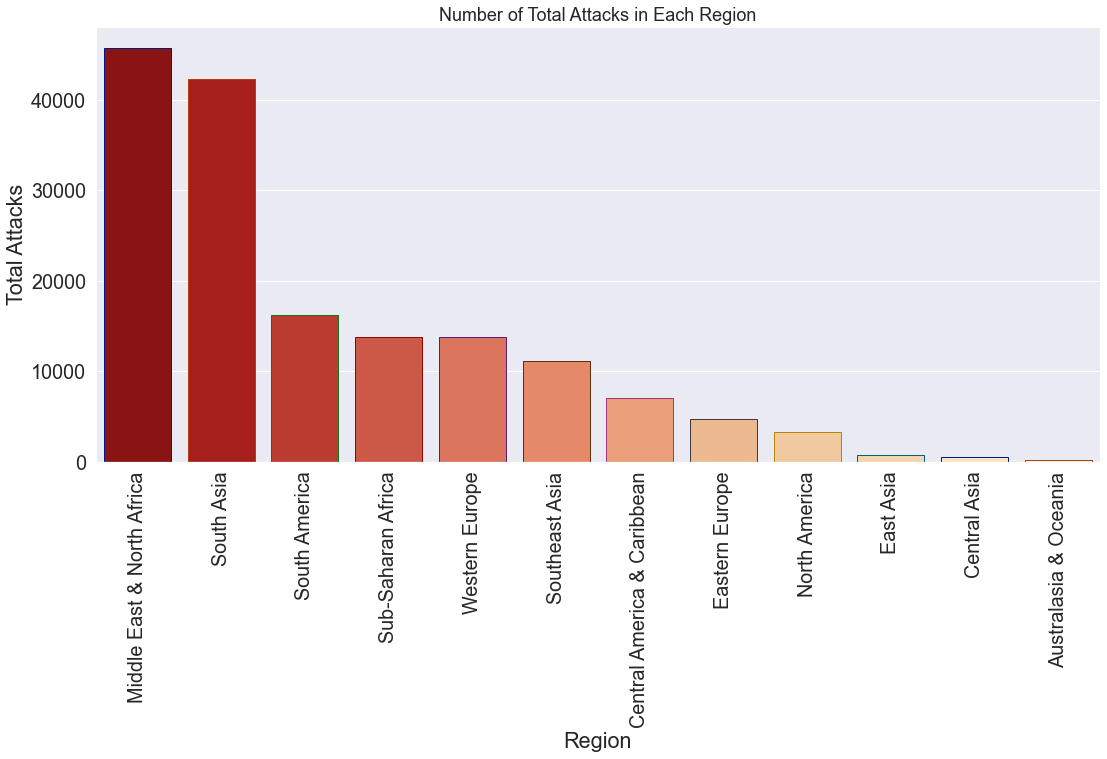

In [62]:
region_attacks = df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(18,8))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='OrRd_r', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number of Total Attacks in Each Region', fontsize=18)
plt.show()

In [11]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['City'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['Attack_Type'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [12]:
df['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

In [13]:
#It's not correct to impute missing city names. So let's drop 
df.dropna(axis=0, how='any', inplace=True)

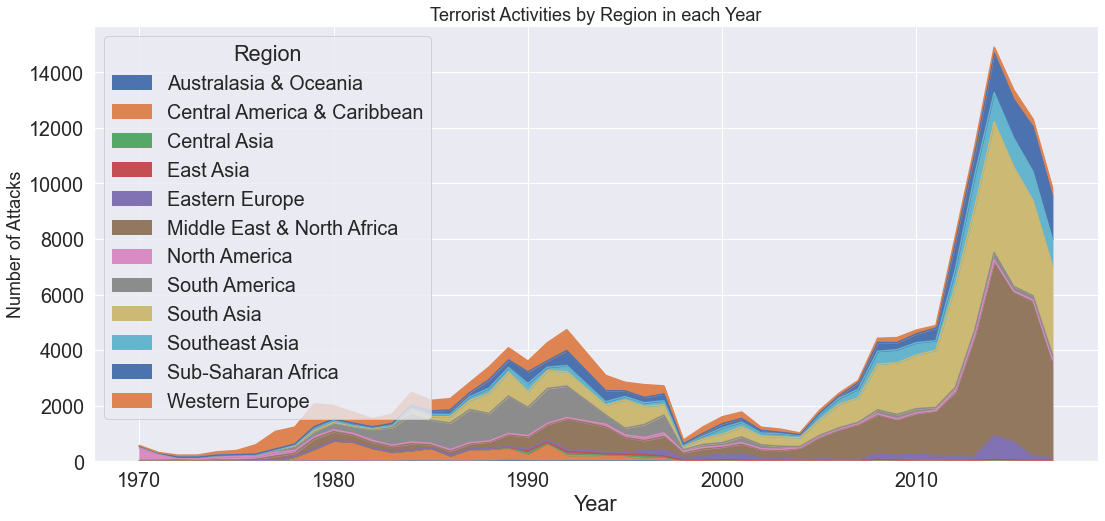

In [71]:
# Terrorist Activities by Region in each Year through Area Plot
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(18,8))
plt.title('Terrorist Activities by Region in each Year', fontsize=18)
plt.ylabel('Number of Attacks', fontsize=18)
plt.show()

In [93]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['Casualities'] = df['Killed'] + df['Wounded']

Text(0.5, 1.0, 'Number of Terrorist Attacks by Region')

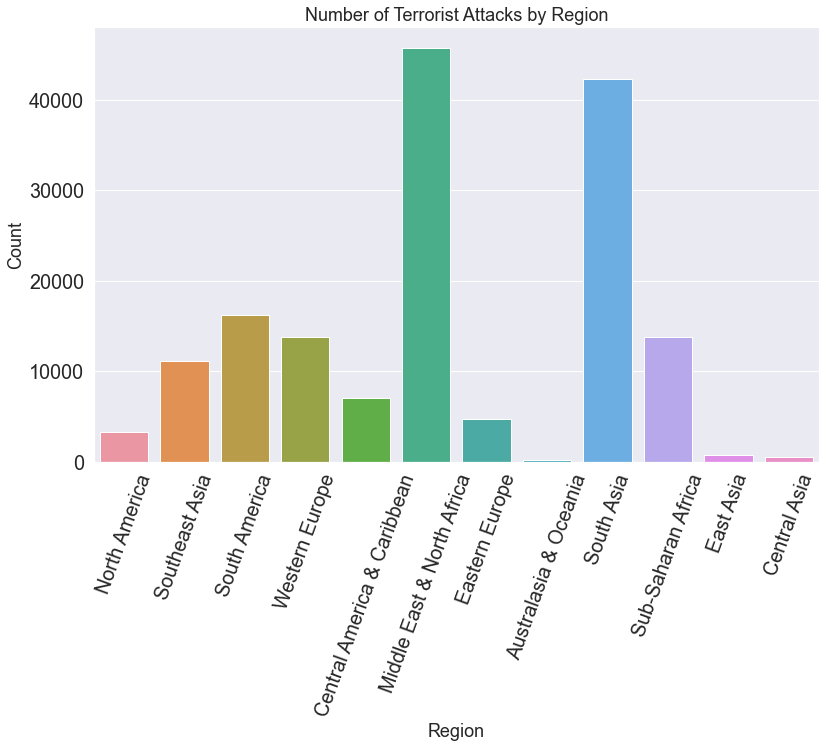

In [70]:
f = plt.figure(figsize=(13, 8))

sns.set(font_scale=1.8)
year_count = sns.countplot(x='Region', data=df,)
year_count.set_xticklabels(year_count.get_xticklabels(), rotation=70)
plt.xlabel('Region', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Number of Terrorist Attacks by Region', fontsize=18)

Text(0.5, 1.0, 'Types of Terrorist Attack ')

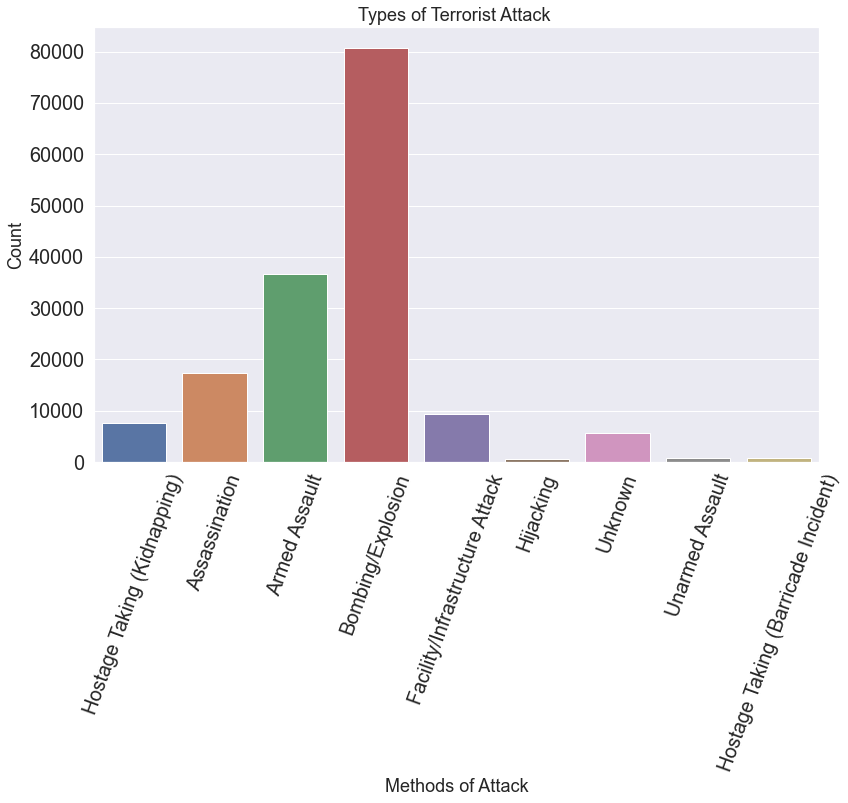

In [69]:
f = plt.figure(figsize=(13, 8))

sns.set(font_scale=1.8)
year_count = sns.countplot(x='Attack_Type', data=df,)
year_count.set_xticklabels(year_count.get_xticklabels(), rotation=70)
plt.xlabel('Methods of Attack', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Types of Terrorist Attack ', fontsize=18)

In [110]:
# Total Number of people killed in terror attack
killData = df.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 333878


In [109]:
#Which terrorist organizations have carried out their operations in each country. 
df.Group.value_counts()[1:20]

Taliban                                             6784
Islamic State of Iraq and the Levant (ISIL)         4704
Shining Path (SL)                                   3761
New People's Army (NPA)                             2393
Al-Shabaab                                          2375
Farabundo Marti National Liberation Front (FMLN)    2243
Revolutionary Armed Forces of Colombia (FARC)       2178
Kurdistan Workers' Party (PKK)                      2130
Basque Fatherland and Freedom (ETA)                 1823
Communist Party of India - Maoist (CPI-Maoist)      1822
Boko Haram                                          1743
Irish Republican Army (IRA)                         1670
Maoists                                             1541
Liberation Tigers of Tamil Eelam (LTTE)             1470
National Liberation Army of Colombia (ELN)          1378
Tehrik-i-Taliban Pakistan (TTP)                     1302
Palestinians                                         915
Al-Qaida in the Arabian Peninsu

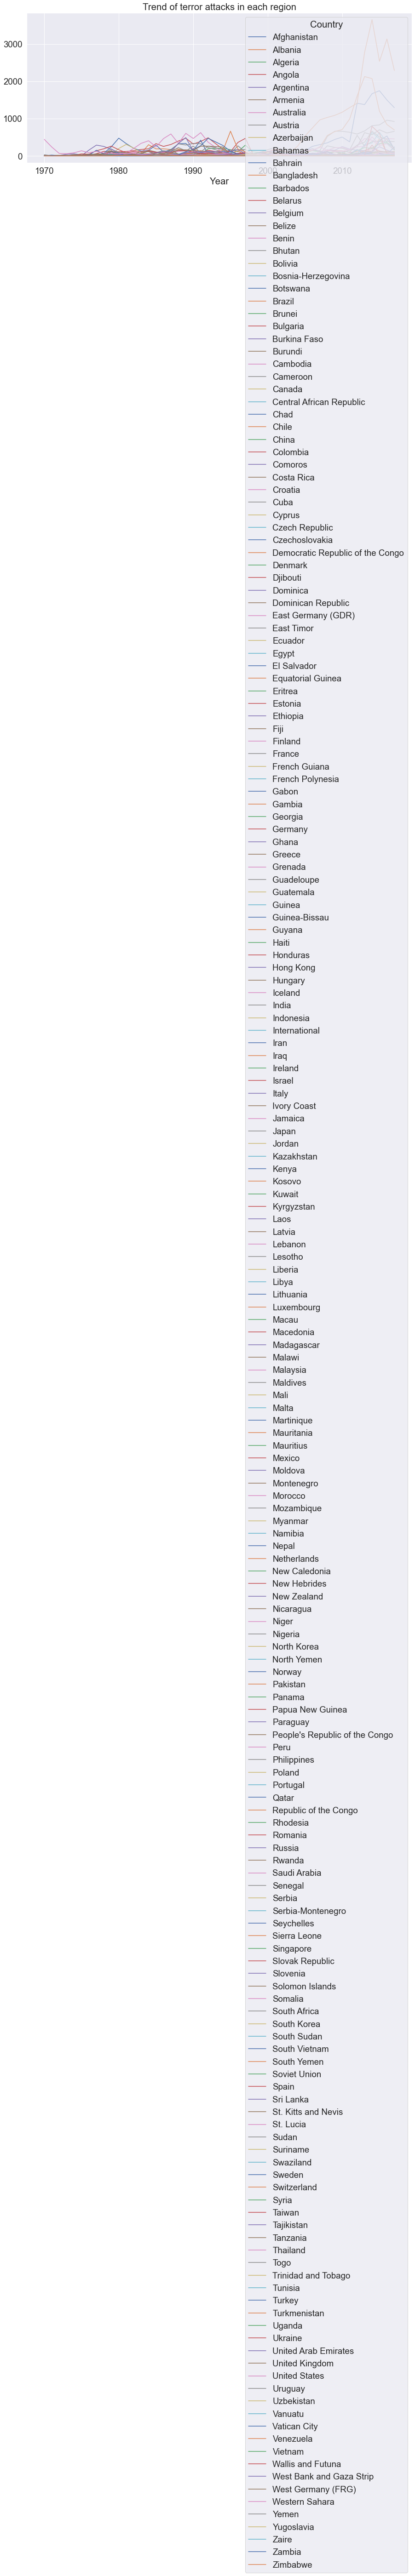

In [127]:
plt.rcParams['figure.figsize']=15,6
terror_area=pd.crosstab(df.Year,df.Country)
terror_area.plot()
plt.title('Trend of terror attacks in each region')
plt.show()

In [ ]:
plt.rcParams['figure.figsize']=15,7
sns.barplot(x=df.Target.value_counts().values, y=df.Target.value_counts().index, palette='inferno')
plt.title('Terorrist\'s favorite target', fontsize=25)
plt.show()

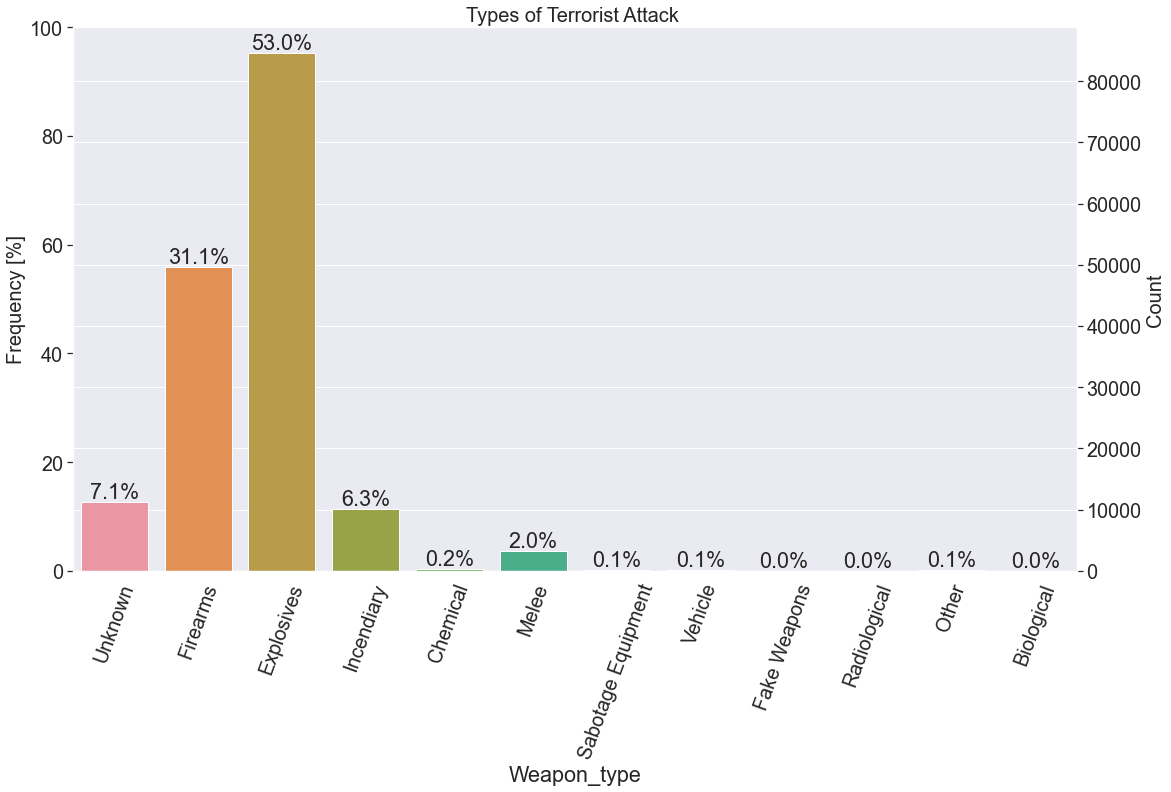

In [54]:
f = plt.figure(figsize=(18, 10))
sns.set(font_scale=1.8)

df['Weapon_type'] = df['Weapon_type'].replace(['Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'], 'Vehicle')

ncount = len(df)

year_count = sns.countplot(x='Weapon_type', data=df,)
year_count.set_xticklabels(year_count.get_xticklabels(), rotation=70)
plt.title('Types of Terrorist Attack ', fontsize=20)

ax2=year_count.twinx()

ax2.yaxis.tick_left()
year_count.yaxis.tick_right()

# Also switch the labels over
year_count.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]', fontsize=20)

for p in year_count.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    year_count.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
# year_count.set_ylim(0, int(ncount/1e3))
year_count.set_ylabel('Count', fontsize=20)

ax2.grid(None)
from warnings import filterwarnings
filterwarnings('ignore')

new selected dataframe:  (42683, 18)


Text(0.5, 1.0, 'Number of Terrorist Attack Year by Year (South Asia)')

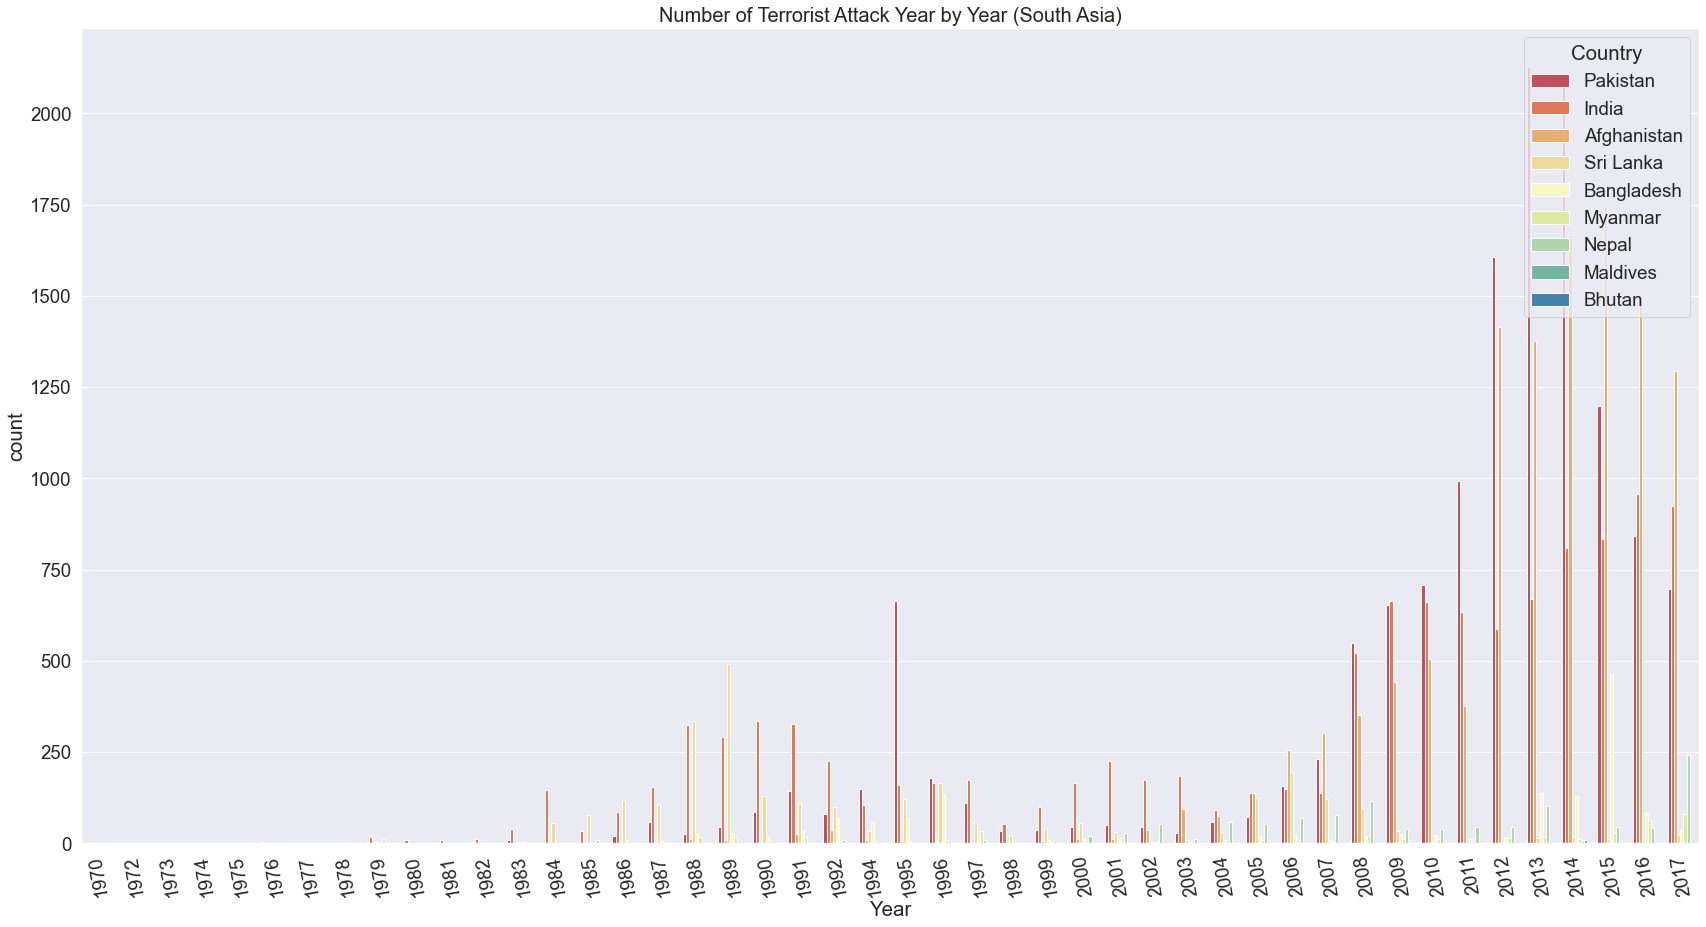

In [114]:
f = plt.figure(figsize=(29, 15))
country_selected = ['Afghanistan', 'India','Pakistan','Sri Lanka','Myanmar','Bangladesh','Nepal','Bhutan','Maldives']
reg_groupby_SA_df_sel_country = df[df['Country'].isin(country_selected)]
print ('new selected dataframe: ', reg_groupby_SA_df_sel_country.shape)
sns.set(font_scale=1.7)
year_count = sns.countplot(x='Year', data=reg_groupby_SA_df_sel_country, hue='Country', palette="Spectral")
year_count.set_xticklabels(year_count.get_xticklabels(), rotation=100)
plt.title('Number of Terrorist Attack Year by Year (South Asia)', fontsize=20)

In [105]:
reg_groupby = df.groupby(['Region'])
reg_groupby_SA_df = reg_groupby.get_group('South Asia')

reg_groupby_SA_df['Casualties'] = reg_groupby_SA_df['Killed'] + reg_groupby_SA_df['Wounded']
reg_groupby_SA_df_most_affected5 = reg_groupby_SA_df.sort_values('Casualties', ascending=True)

reg_groupby_SA_df_most_affected_grp_country = reg_groupby_SA_df_most_affected5.groupby(['Country'])['Casualties'].sum()
print ('Attacks and people affected in South asia region: \n', reg_groupby_SA_df_most_affected_grp_country)

Attacks and people affected in South asia region: 
 Country
Afghanistan    79446
Bangladesh      8272
Bhutan            13
India          45823
Maldives         140
Mauritius          1
Nepal           3386
Pakistan       63725
Sri Lanka      28649
Name: Casualties, dtype: int32


Text(0.5, 1.0, 'Fig. 10: South Asian Countries Affected in Terrorist Attack ')

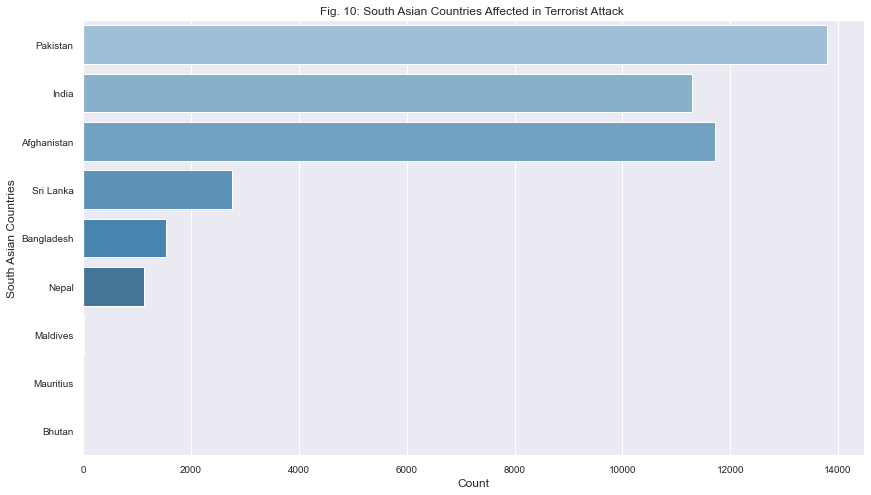

In [112]:
f = plt.figure(figsize=(14, 8))

sns.set(font_scale=0.9)

Country_count_SA = sns.countplot(y='Country', data=reg_groupby_SA_df, palette='Blues_d')
# year_count.set_xticklabels(year_count.get_xticklabels(), rotation=70)
Country_count_SA.set_xlabel('Count', fontsize=12)
Country_count_SA.set_ylabel('South Asian Countries', fontsize=12)
plt.title('Fig. 10: South Asian Countries Affected in Terrorist Attack ', fontsize=12)

In [115]:
print ('number of attacks in respective countries: \n')
print (reg_groupby_SA_df['Country'].value_counts())

number of attacks in respective countries: 

Pakistan       13798
Afghanistan    11716
India          11293
Sri Lanka       2758
Bangladesh      1536
Nepal           1134
Maldives          20
Bhutan             4
Mauritius          2
Name: Country, dtype: int64


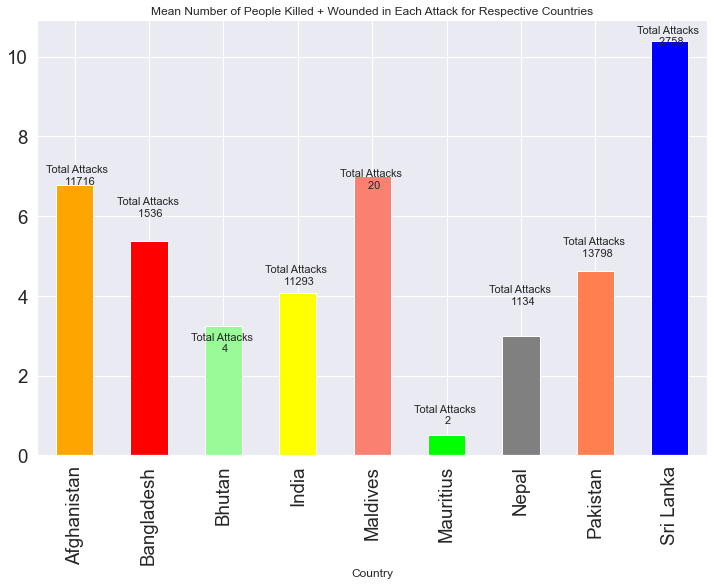

In [119]:
reg_groupby_SA_df['Casualties'] = reg_groupby_SA_df['Killed'] + reg_groupby_SA_df['Wounded']

### plot the mean number of people injured + killed over all the attacks in respective countries  
f = plt.figure(figsize=(10, 7))
reg_groupby_SA_df_grp_country_affected = reg_groupby_SA_df.groupby(['Country'])['Casualties'].mean()
reg_groupby_SA_df_grp_country_affected.plot.bar(figsize=(12, 8), color=['orange', 'red', 'palegreen', 'yellow', 'salmon', 'lime', 'gray', 'coral', 'blue'])
plt.title('Mean Number of People Killed + Wounded in Each Attack for Respective Countries', fontsize=12)
plt.xlabel('Country', fontsize=12)

plt.text(8, 10.3, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Sri Lanka']), horizontalalignment='center', fontsize=11)
plt.text(7, 5, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Pakistan']), horizontalalignment='center', fontsize=11)
plt.text(6, 3.8, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Nepal']), horizontalalignment='center', fontsize=11)
plt.text(5, 0.8, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Mauritius']), horizontalalignment='center', fontsize=11)
plt.text(4, 6.7, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Maldives']), horizontalalignment='center', fontsize=11)
plt.text(3, 4.3, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['India']), horizontalalignment='center', fontsize=11)
plt.text(2, 2.6, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Bhutan']), horizontalalignment='center', fontsize=11)
plt.text(1, 6.0, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Bangladesh']), horizontalalignment='center', fontsize=11)
plt.text(0.05, 6.8, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Afghanistan']), horizontalalignment='center', fontsize=11)

plt.show()


In [120]:
reg_groupby_SA_df_most_affected5 = reg_groupby_SA_df.sort_values('Casualties', ascending=False).head(5)
reg_groupby_SA_df_most_affected5

,Year,Month,Day,Country,State,Region,City,latitude,longitude,Attack_Type,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type,casualities,Casualties
61548,1996,1,31,Sri Lanka,Western,South Asia,Colombo,6.941837,79.861687,Bombing/Explosion,90,1272,1362,Bank,Liberation Tigers of Tamil Eelam (LTTE),Business,Explosives,1362,1362
81098,2006,7,11,India,Maharashtra,South Asia,Mumbai,19.075984,72.877656,Bombing/Explosion,188,817,1005,People in rush hour,Lashkar-e-Taiba (LeT),Transportation,Explosives,1005,1005
76347,2004,3,21,Nepal,Central,South Asia,Dhading district,27.959441,84.895897,Armed Assault,518,216,734,"Government infrastructure in the town of Bedi,...",Communist Party of Nepal- Maoist (CPN-M),Government (General),Firearms,734,734
175415,2017,5,31,Afghanistan,Kabul,South Asia,Kabul,34.516895,69.147011,Bombing/Explosion,93,491,584,Contractors,Khorasan Chapter of the Islamic State,Government (Diplomatic),Explosives,584,584
153580,2015,9,28,Afghanistan,Kunduz,South Asia,Kunduz,36.705776,68.877060,Armed Assault,240,296,536,City,Taliban,Private Citizens & Property,Firearms,536,536
